# Case Study: Predicting Bike Rentals Using Feature Engineering Techniques

## Objective: 

<font size =4> The goal of this case study is to predict the number of bike rentals on a given day based on various features. We'll apply different feature engineering techniques to improve the accuracy of our predictions, extracting meaningful features from raw data and selecting the most relevant ones.

#### Dataset
The dataset consists of historical bike rental data with the following columns:

- date_time: Timestamp of the rental
- temperature: Temperature at the time of the rental (in degrees Celsius)
- humidity: Humidity level (in percentage)
- wind_speed: Wind speed at the time of the rental (in km/h)
- holiday: Whether the day is a holiday (binary: 0 or 1)
- working_day: Whether it is a working day (binary: 0 or 1)
- weather_condition: Weather condition (categorical: Clear, Cloudy, Rainy)
- rentals: The number of bikes rented (target variable)


In [2]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples
n_samples = 1000

# Generate synthetic data
date_time = pd.date_range(start='2023-01-01', periods=n_samples, freq='H')#hourly data
temperature = np.random.uniform(5, 35, n_samples)  # temperature in Celsius
humidity = np.random.uniform(30, 90, n_samples)  # humidity in percentage
wind_speed = np.random.uniform(0, 30, n_samples)  # wind speed in km/h
holiday = np.random.choice([0, 1], n_samples, p=[0.85, 0.15])  # 15% chance of holiday
working_day = np.where(holiday == 1, 0, np.random.choice([0, 1], n_samples, p=[0.2, 0.8]))  # not working on holidays
weather_condition = np.random.choice(['Clear', 'Cloudy', 'Rainy'], n_samples, p=[0.6, 0.3, 0.1])  # weather distribution

# Generate rentals (target variable) based on some logical relations
rentals = (
    300 + 
    (temperature - 20) * 15 +   # more rentals at moderate temperatures
    (humidity - 60) * (-5) +    # fewer rentals in high humidity
    (wind_speed * (-3)) +       # fewer rentals with higher wind speed
    (holiday * (-100)) +        # fewer rentals on holidays
    (working_day * 100) +       # more rentals on working days
    np.random.normal(0, 50, n_samples)  # noise
)

# Ensure rentals are non-negative and rounded
rentals = np.maximum(rentals, 0).round().astype(int)

# Create a DataFrame
df_synthetic = pd.DataFrame({
    'date_time': date_time,
    'temperature': temperature,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'holiday': holiday,
    'working_day': working_day,
    'weather_condition': weather_condition,
    'rentals': rentals
})

# Display the first few rows of the synthetic dataset
df_synthetic.head(1000)


,date_time,temperature,humidity,wind_speed,holiday,working_day,weather_condition,rentals
0,2023-01-01 00:00:00,16.236204,41.107976,7.851171,0,1,Clear,362
1,2023-01-01 01:00:00,33.521429,62.514057,7.409364,0,1,Clear,592
2,2023-01-01 02:00:00,26.959818,82.376750,27.187637,0,1,Cloudy,325
3,2023-01-01 03:00:00,22.959755,73.933493,7.486386,0,0,Clear,300
4,2023-01-01 04:00:00,9.680559,78.393669,8.158492,0,0,Cloudy,0
...,...,...,...,...,...,...,...,...
995,2023-02-11 11:00:00,7.747462,69.417309,25.958873,0,1,Cloudy,80
996,2023-02-11 12:00:00,32.519407,87.396877,4.718196,0,0,Clear,343
997,2023-02-11 13:00:00,9.104559,34.137481,9.293636,0,1,Cloudy,335
998,2023-02-11 14:00:00,33.507121,33.423283,8.701366,0,1,Clear,702


In [3]:
# Save the synthetic dataset to a CSV file
df_synthetic.to_csv('synthetic_bike_rentals_dataset.csv', index=False)

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('synthetic_bike_rentals_dataset.csv')

df


,date_time,temperature,humidity,wind_speed,holiday,working_day,weather_condition,rentals
0,2023-01-01 00:00:00,16.236204,41.107976,7.851171,0,1,Clear,362
1,2023-01-01 01:00:00,33.521429,62.514057,7.409364,0,1,Clear,592
2,2023-01-01 02:00:00,26.959818,82.376750,27.187637,0,1,Cloudy,325
3,2023-01-01 03:00:00,22.959755,73.933493,7.486386,0,0,Clear,300
4,2023-01-01 04:00:00,9.680559,78.393669,8.158492,0,0,Cloudy,0
...,...,...,...,...,...,...,...,...
995,2023-02-11 11:00:00,7.747462,69.417309,25.958873,0,1,Cloudy,80
996,2023-02-11 12:00:00,32.519407,87.396877,4.718196,0,0,Clear,343
997,2023-02-11 13:00:00,9.104559,34.137481,9.293636,0,1,Cloudy,335
998,2023-02-11 14:00:00,33.507121,33.423283,8.701366,0,1,Clear,702


In [6]:
# 2. Feature Extraction
# 2.1. Extracting Date and Time Features

# Convert 'date_time' to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract new features from 'date_time'
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

# Display the first few rows with the new features
print(df[['date_time', 'hour', 'day_of_week', 'month']].head())

            date_time  hour  day_of_week  month
0 2023-01-01 00:00:00     0            6      1
1 2023-01-01 01:00:00     1            6      1
2 2023-01-01 02:00:00     2            6      1
3 2023-01-01 03:00:00     3            6      1
4 2023-01-01 04:00:00     4            6      1


In [7]:
# Apply One-Hot Encoding on the 'weather_condition' column
df = pd.get_dummies(df, columns=['weather_condition'], prefix='weather')

# Display the dataframe with new features
print(df.head())

            date_time  temperature   humidity  wind_speed  holiday  \
0 2023-01-01 00:00:00    16.236204  41.107976    7.851171        0   
1 2023-01-01 01:00:00    33.521429  62.514057    7.409364        0   
2 2023-01-01 02:00:00    26.959818  82.376750   27.187637        0   
3 2023-01-01 03:00:00    22.959755  73.933493    7.486386        0   
4 2023-01-01 04:00:00     9.680559  78.393669    8.158492        0   

   working_day  rentals  hour  day_of_week  month  weather_Clear  \
0            1      362     0            6      1           True   
1            1      592     1            6      1           True   
2            1      325     2            6      1          False   
3            0      300     3            6      1           True   
4            0        0     4            6      1          False   

   weather_Cloudy  weather_Rainy  
0           False          False  
1           False          False  
2            True          False  
3           False          Fal

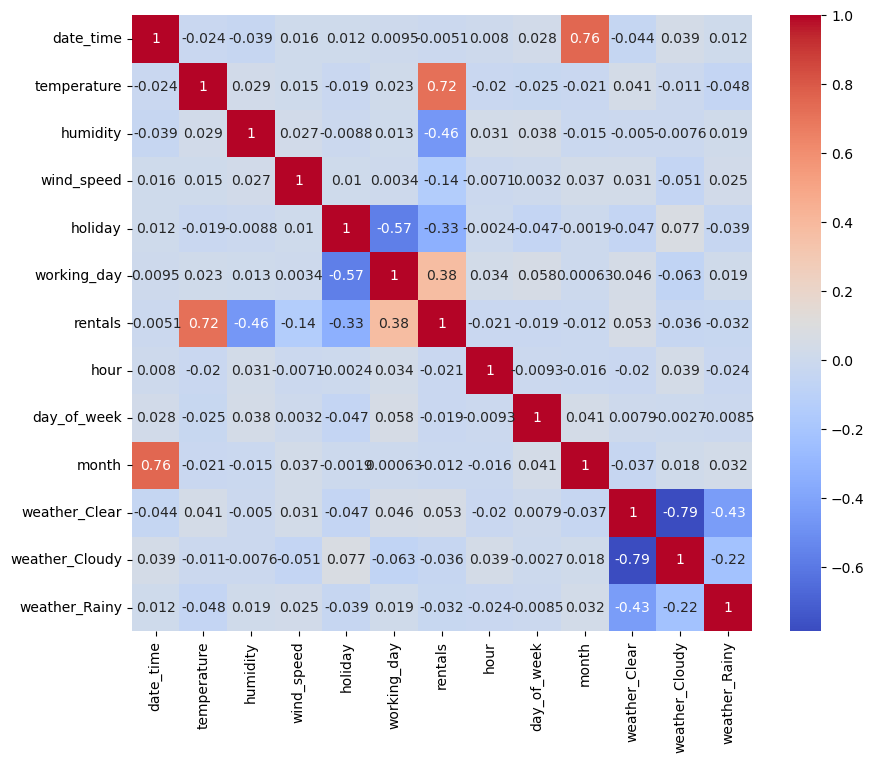

In [8]:
# 3. Feature Selection
# 3.1. Removing Redundant Features
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [11]:
# 3.2. Recursive Feature Elimination (RFE)
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Define the feature matrix (X) and target variable (y)
X = df.drop(columns=['date_time', 'rentals'])
y = df['rentals']
X


,temperature,humidity,wind_speed,holiday,working_day,hour,day_of_week,month,weather_Clear,weather_Cloudy,weather_Rainy
0,16.236204,41.107976,7.851171,0,1,0,6,1,True,False,False
1,33.521429,62.514057,7.409364,0,1,1,6,1,True,False,False
2,26.959818,82.376750,27.187637,0,1,2,6,1,False,True,False
3,22.959755,73.933493,7.486386,0,0,3,6,1,True,False,False
4,9.680559,78.393669,8.158492,0,0,4,6,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
995,7.747462,69.417309,25.958873,0,1,11,5,2,False,True,False
996,32.519407,87.396877,4.718196,0,0,12,5,2,True,False,False
997,9.104559,34.137481,9.293636,0,1,13,5,2,False,True,False
998,33.507121,33.423283,8.701366,0,1,14,5,2,True,False,False


In [25]:
# Initialize a linear regression model
model = LinearRegression()

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=2)  # Select top 5 features
fit = rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[fit.support_]
print("Selected Features: ", selected_features)

Selected Features:  Index(['holiday', 'working_day'], dtype='object')


In [26]:
# 4. Model Building
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)


In [27]:
#Train the Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 25306.090030912346


# Complete Code

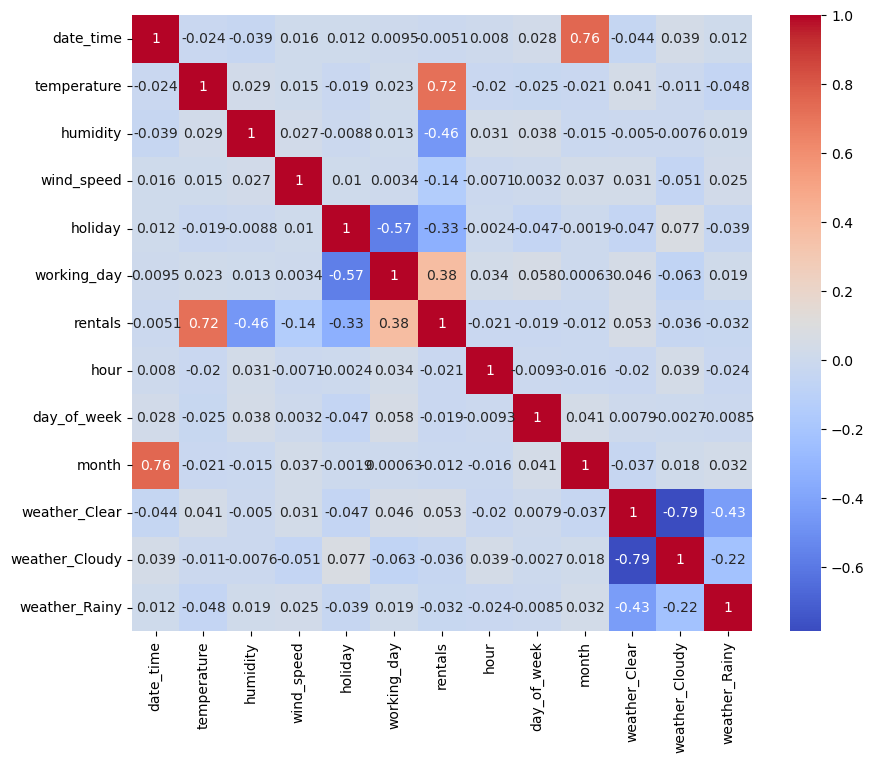

Selected Features:  Index(['temperature', 'humidity', 'holiday', 'working_day', 'weather_Cloudy'], dtype='object')
Mean Squared Error: 3808.9507480000007


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('synthetic_bike_rentals_dataset.csv')

# Convert 'date_time' to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Feature extraction: Date and time features
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

# One-hot encoding for categorical variable
df = pd.get_dummies(df, columns=['weather_condition'], prefix='weather')

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Feature selection using Recursive Feature Elimination (RFE)
X = df.drop(columns=['date_time', 'rentals']) # temp = 0.6 weather = 0.2
y = df['rentals']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
print("Selected Features: ", selected_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")